# Breaking the Bootstrap

Bootstrapping is immensely versatile and useful way to estimate the accuracy/distribution of sample estimates, but there are conditions under which it can fail.

It looks as though (some) causal inference methods might be particularly susceptible to these hazards, based on certain assumptions we make.

There are alternative resampling methods or variations that might be useful to know about, and some useful rules of thumb to keep in mind.

In [1]:
import matplotlib.pyplot as plt

import break_bs as bbs


## Definitions
Firstly, let's define our terms. I'm paraphrasing from Politis et al, 1999.

We have an (unknown) probability distribution $P\in \mathbf{P}$, from which we draw sample $x_n = (X_1,...X_n)$ of iid random variables.

We're interested in some attribute $\theta(P)$ of the distribution (e.g. the expected value/maximum/ATE... etc). I'm going to consider a real-valued attribute, but this theory can be extended to broader spaces.

We will have some estimator $\hat\theta_n$ which estimates $\theta(P)$, presumably using the information in $x_n$. This can be parametric or non-parametric. 

[aside E.g. if $P_n$ is the empirical distribution of the data, we might have $\hat\theta_n = \theta(P_n)$ (non-parametric); we could also have $\hat\theta_n = t(\hat\psi_n)$ where $\hat\psi_n$ is an estimate of $\psi$, used to index the family of probability distributions $\mathbf{P}$ (parametric)]

Then we want to construct e.g. confidence intervals of this attribute. This is framed in terms of a *root* (Beran, 1984, Politis et al. 1999) $R_n(x_n, \theta(P)$; this is an (arbitrary) functional that we might be interested in. E.g. $R_n = \hat\theta - \theta(P)$.

Sampling distribution: $J_n(P)$ is the distribution of the root $R_n(x_n, \theta(P))$ given that we draw a samples of size $n$ from $P$. $J_n(t, P)$ is its c.d.f.

To get a confidence intervals for $\theta(P)$ based on $R_n$ we need to estimate $J_n(P)$ somehow


### Bootstrapping; sampling subsets of size $n$ with replacement

Esimate finite sampling distribution $J_n(P)$ using $J_n(\hat P_n)$ where $\hat P_n$ is an estimate of $P$. Nonparametric methods Typically take $\hat P_n$ to be the empirical distribution of $P$, as above, e.g. by *sampling with replacement*

### Convergence in probability

A sequence of random variables $X_n$ converges in probability towards random variable $X$ if for all $\varepsilon>0$, for all $\delta$ there is some $N$ such that for all $n\geq N$:
$Pr(X_n \text{outside ball of radius} \varepsilon \text{centred at} \delta)$
That is,
$$\lim_{n\to \infty} Pr[d(X_n-X)>\varepsilon] = 0$$

### Consistent Estimators

An estimator $\hat\theta_n$ of attribute $\theta(P)$ is *consistent* if it converges in probability to $\theta(P)$.


### Weak convergence

## Bootstrapping is not always consistent

The key idea is that **bootstrapping isn't always consistent**; it doesn't always converge.

The most important feature is that we need $J_n(P)$ to be *smooth* in $P$. 

This seems to be a hassle to prove -- I think looking at some counter-examples is useful.

## Rules of thumb

Most of the issues I've seen come up tend to center on *duplicate data points*

## Counter-examples

### Artificial mean estimator
An artificial counter-example:

- $X \sim N(\mu, \sigma) = P$
- $\theta(P)=\mathbb{E}(X) = \mu$
and
$$\hat\theta_n = 
\begin{cases} 
\bar{X_n} &\text{if } X_n \text{ contains no duplicates}\\
0 &\text{otherwise}

\end{cases}$$

Here we're artificially introducing an estimator that will break if it sees duplicates; this almost surely never happens on true samples from $P$, but almost always when sampling a substantial number of values with replacement, as in the naive bootstrap method (and when sub-sampling with replacement if $b > O(\sqrt{n})$

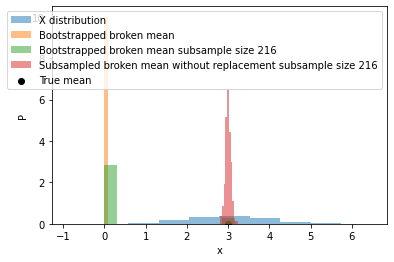

In [2]:
bbs.politis_strong_artificial_counterexample()
plt.show()

### Extreme value estimator

### Simple ATT (and maybe even ATE?) estimator **using matching**


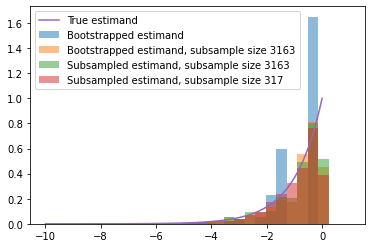

In [3]:
bbs.politis_extreme_order_statistic()
plt.show()

## More robust methods

### Bootstrapping smaller subsets; subsampling size $m<n$ with replacement
- in particular if $b \leq O(\sqrt(n))$, this paradigm approximates subsampling without replacement


### Subsampling without replacement (exhaustive/random)

- Key insight: **every sample is a valid sample from the original population**
- More applicable; weaker assumptions required for first-order convergence
  - If bootstrap can be used it's got better second-order convergence; faster



|       | with replacement                   | without replacement |
| ----- | ---------------------------------- | ------------------- |
| $b<n$ | Bootstrap with "sample size trick" | Subsampling         |
| $b=n$ | Standard bootstrap                 | Redundant (repeating with same sample)          |




## Taxonomy of some areas of concern, and 

Many of the issues I've seen come up centre on the issue of **duplicate data points** or **boundaries/extreme values** (or dependence on sample size)

### Duplicates
- the estimator in the first counter example is explicitly designed to break when data points are duplicated
- matching estimator clearly breaks under 


## Boundaries and extrema

- Extreme order statistic
- Andrews: boundaries
  - generalisation: coefficients in model may be on a boundary of parameter-space, in which case bootstrap variance estimate may break; note variance is non-negative